In [86]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as sp
%load_ext google.cloud.bigquery
import pickle
from matplotlib import pyplot as plt
from datetime import datetime
with open('design.pkl','rb') as f:
    set_params = pickle.load(f)
plt.rcParams.update(set_params)

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [87]:
df = pd.read_csv('ZEV_compliance_tracker.csv', index_col=0)

In [88]:
# fig, ax = plt.subplots()

# dfa.plot(x='make', y=[
#     'ZEV Surplus', 
#     'ZEV Surplus after CO2', 
#     # 'ZEV Surplus after CO2 - Proposed'
# ], kind='barh', ax=ax, figsize=(10, 10))
# ax.set_xlabel('ZEV Credit Surplus/Shortfall')
# ax.set_ylabel('')

# ax.set_title('ZEV Mandate: Sales vs Year 1 Target as of {}'.format(last_month))

# plt.savefig('plots/top_20_last_12_months_{}.png'.format(this_month), transparent=False, bbox_inches='tight', dpi=300, facecolor='white')
# plt.show()

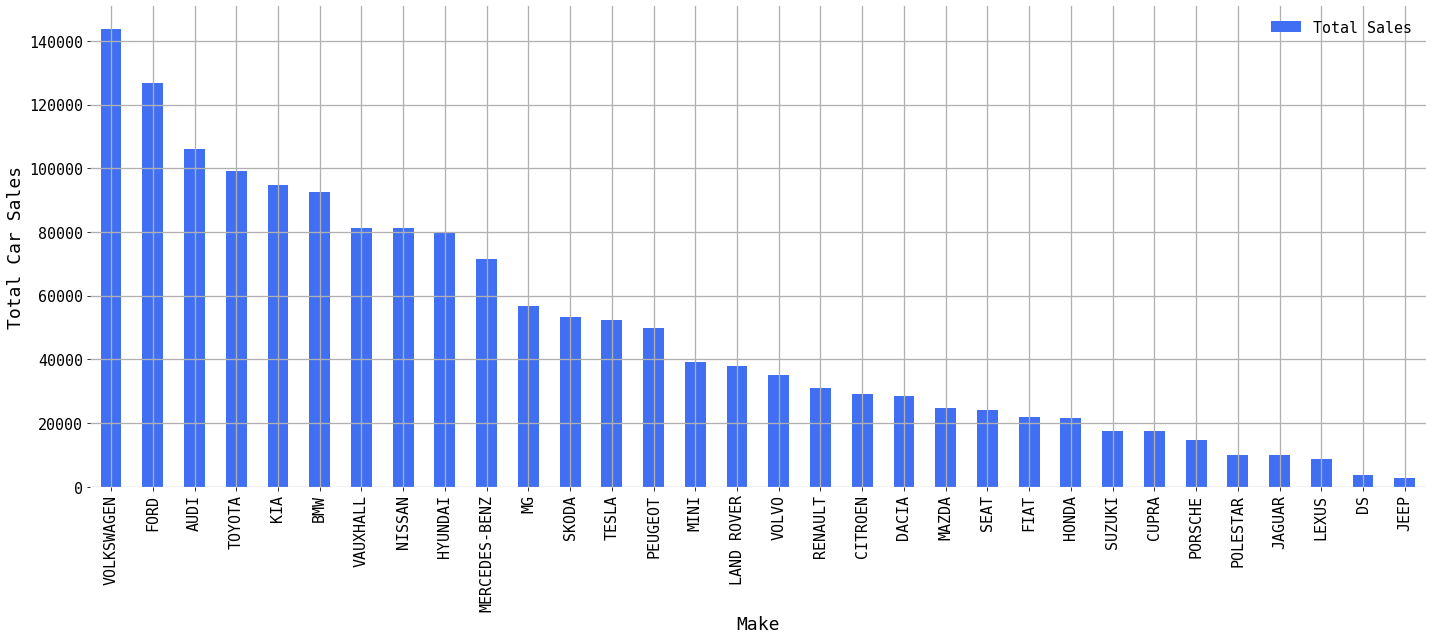

In [89]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Total Sales', kind='bar', ax=ax)

ax.set_ylabel('Total Car Sales')

plt.savefig('plots/how_s1.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')


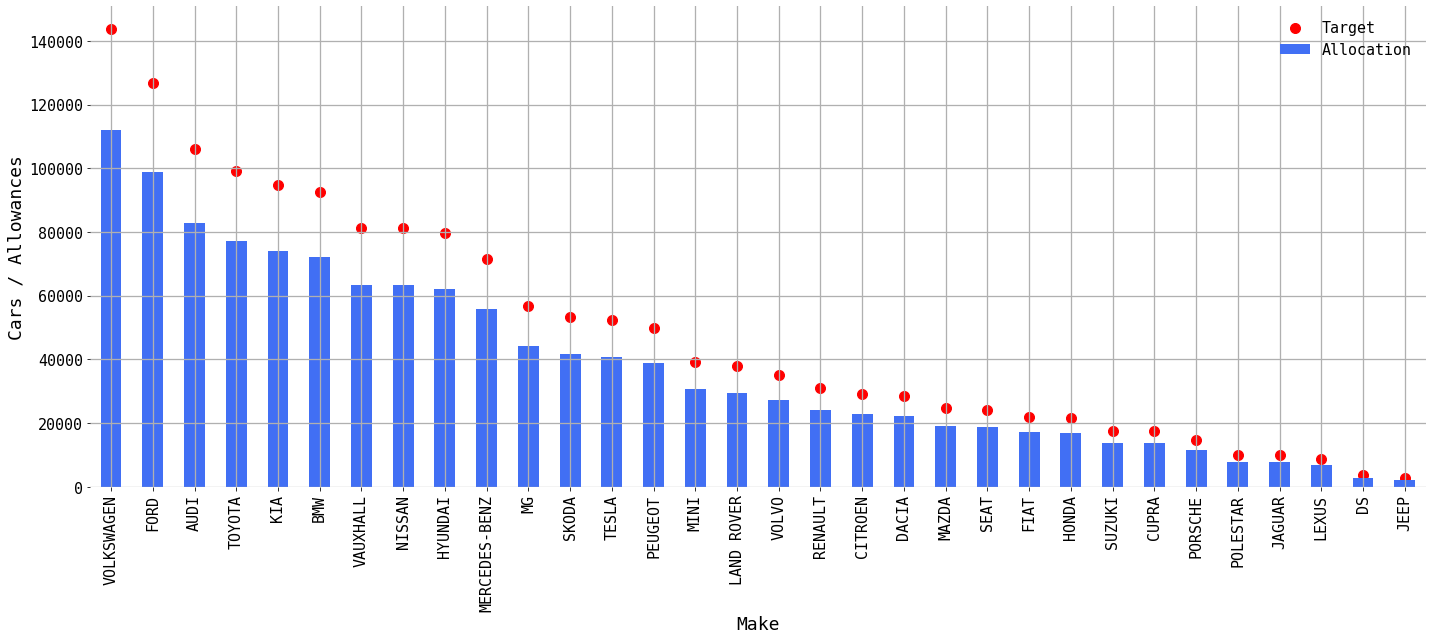

In [90]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Allocated allowances', kind='bar', ax=ax, label='Allocated Allowances')
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s2.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

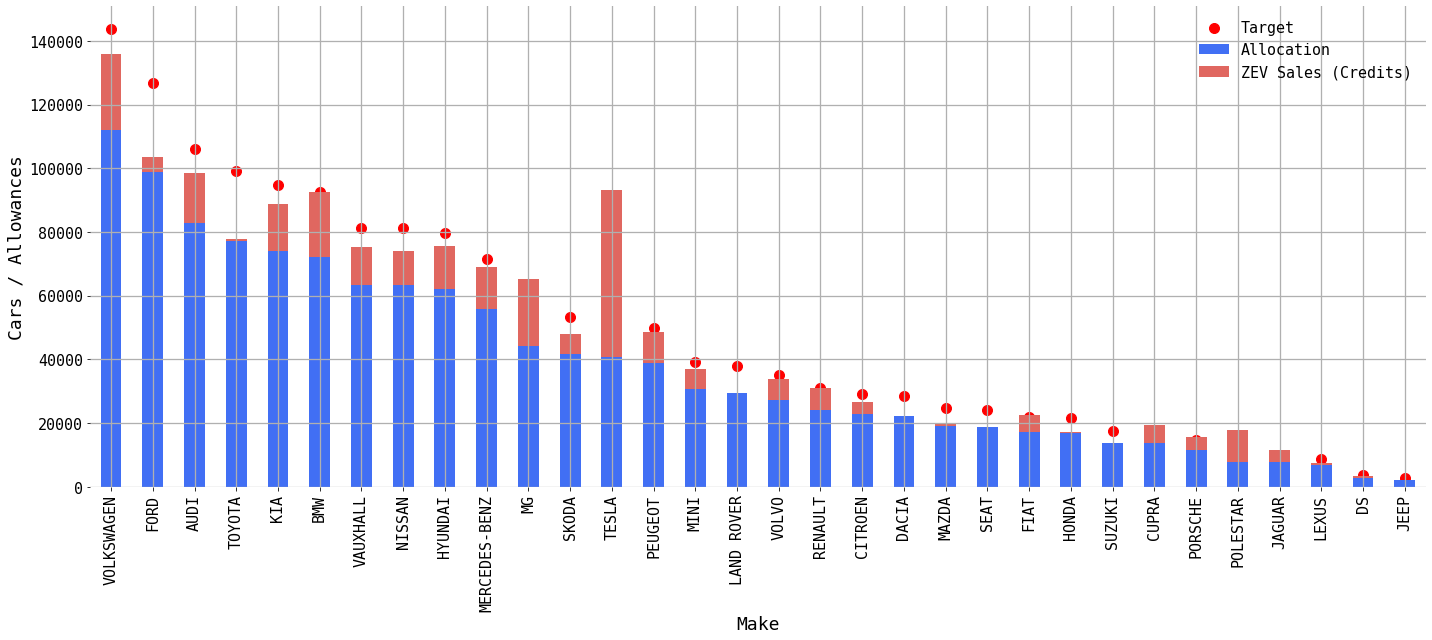

In [91]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s3.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [92]:
df['ZEV Credits available from CO2'] = df['Allowance Surplus (after CO2 transfers)'] - df['Allowance Surplus']
df

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2
31,VOLKSWAGEN,143625,119894,23731,139.81,133.74,112027.50,-7866.50,-5481.00,2385.50
30,FORD,126691,121917,4774,127.00,126.52,98818.98,-23098.02,-22906.29,191.73
29,AUDI,106173,90414,15759,142.00,146.84,82814.94,-7599.06,-7599.06,0.00
28,TOYOTA,99037,98379,658,110.47,108.41,77248.86,-21130.14,-20464.60,665.54
27,KIA,94702,79825,14877,135.70,123.17,73867.56,-5957.44,-2681.38,3276.06
26,BMW,92528,72179,20349,130.08,134.38,72171.84,-7.16,-7.16,0.00
25,VAUXHALL,81268,69511,11756,127.64,124.93,63389.04,-6121.96,-5506.21,615.75
24,NISSAN,81102,70237,10865,142.63,135.46,63259.56,-6977.44,-5326.03,1651.41
23,HYUNDAI,79795,66292,13503,127.24,123.16,62240.10,-4051.90,-3167.51,884.39
22,MERCEDES-BENZ,71567,58247,13320,137.09,146.23,55822.26,-2424.74,-2424.74,0.00


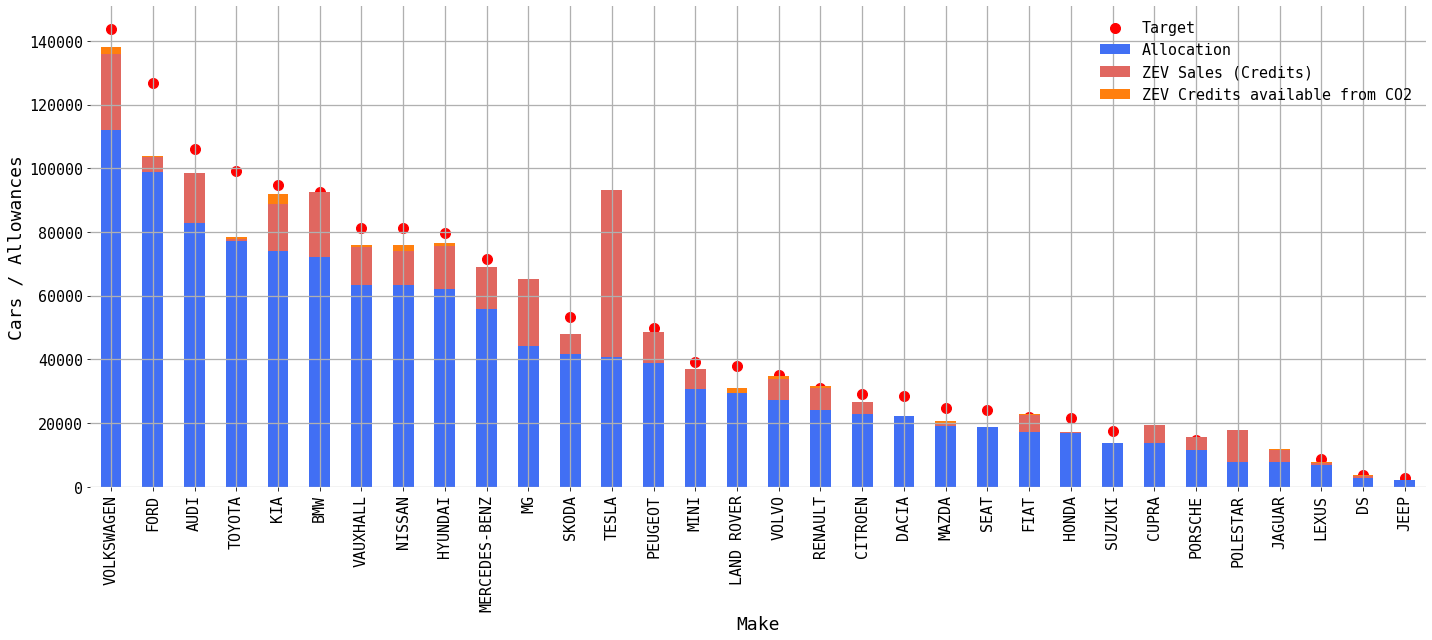

In [93]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)', 'ZEV Credits available from CO2'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s4.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

## Trading

In [94]:
allowances_for_sale = df[df['Allowance Surplus (after CO2 transfers)']>0]['Allowance Surplus (after CO2 transfers)'].sum()
allowances_needed = df[df['Allowance Surplus (after CO2 transfers)']<0]['Allowance Surplus (after CO2 transfers)'].sum()

In [95]:
market_deficit_percentage = allowances_for_sale / (-1*allowances_needed)

In [108]:
df['Credit Sales'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: (-1*x) if x>0 else 0)

df['Credit Purchases'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: market_deficit_percentage * (-1*x) if x<0 else 0)
df['Credits Used for Compliance'] = df.apply(lambda row: row['ZEV Sales'] if row['Allowance Surplus (after CO2 transfers)'] < 0 else row['Total Sales'] - row['Allocated allowances'], axis=1)

In [109]:
df['Credit Sales'].sum()

-63790.37000000001

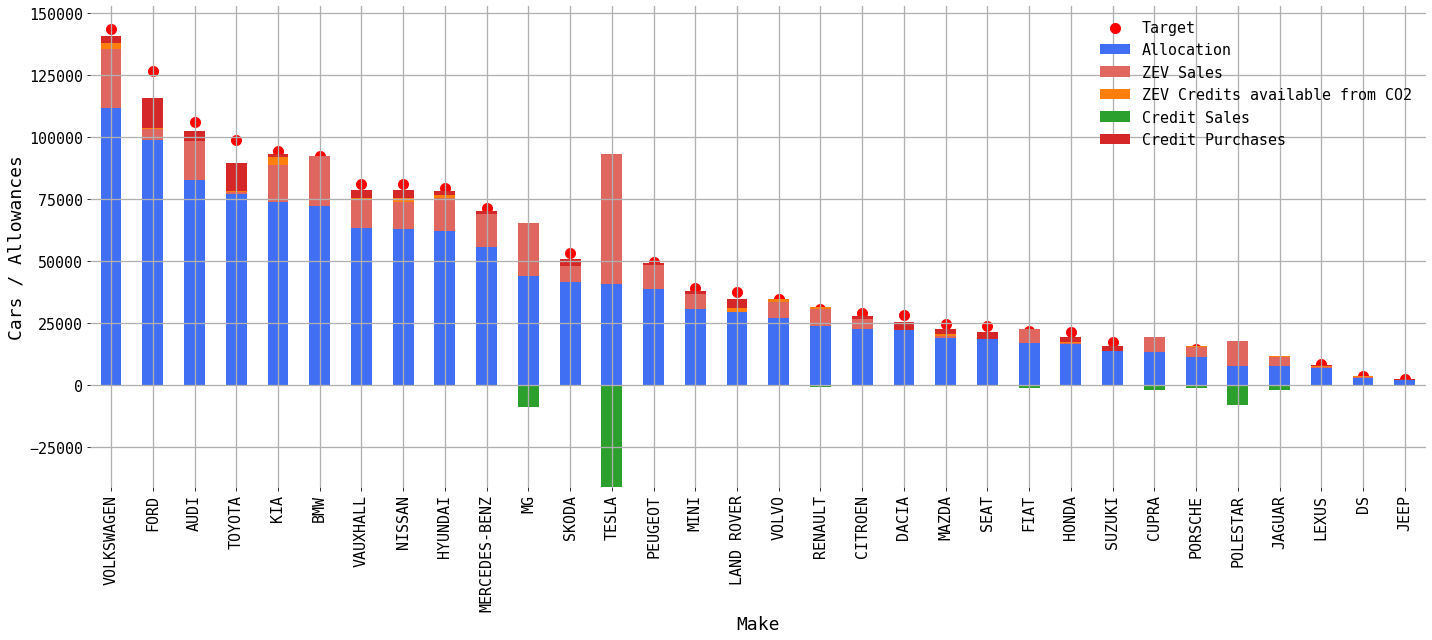

In [114]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(
    x='Make', 
    y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], 
    kind='bar', 
    ax=ax, 
    label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s5.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [118]:
df['Allowance Surplus after Trading'] = df.apply(lambda row: row['Credit Purchases'] + row['Allowance Surplus (after CO2 transfers)'] + row['Credit Sales'], axis=1)

In [125]:
df['Borrowable'] = df.apply(lambda row: row['Total Sales'] *.16, axis=1)

In [126]:
df.sort_values('Allowance Surplus after Trading')

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2,Credit Sales,Credit Purchases,Credits Used for Compliance,Allowance Surplus after Trading,Borrowable
30,FORD,126691,121917,4774,127.00,126.52,98818.98,-23098.02,-22906.29,191.73,0.00,12305.427383,4774.00,-10600.862617,20270.56
28,TOYOTA,99037,98379,658,110.47,108.41,77248.86,-21130.14,-20464.60,665.54,0.00,10993.733565,658.00,-9470.866435,15845.92
29,AUDI,106173,90414,15759,142.00,146.84,82814.94,-7599.06,-7599.06,0.00,0.00,4082.270896,15759.00,-3516.789104,16987.68
16,LAND ROVER,37812,37811,1,177.53,164.20,29493.36,-8317.64,-6665.67,1651.97,0.00,3580.846927,1.00,-3084.823073,6049.92
12,DACIA,28431,28431,0,134.54,132.35,22176.18,-6254.82,-6050.37,204.45,0.00,3250.303243,0.00,-2800.066757,4548.96
25,VAUXHALL,81268,69511,11756,127.64,124.93,63389.04,-6121.96,-5506.21,615.75,0.00,2957.976491,11756.00,-2548.233509,13002.88
31,VOLKSWAGEN,143625,119894,23731,139.81,133.74,112027.50,-7866.50,-5481.00,2385.50,0.00,2944.433494,23731.00,-2536.566506,22980.00
24,NISSAN,81102,70237,10865,142.63,135.46,63259.56,-6977.44,-5326.03,1651.41,0.00,2861.182470,10865.00,-2464.847530,12976.32
20,SKODA,53364,46918,6446,129.70,134.72,41623.92,-5294.08,-5294.08,0.00,0.00,2844.018695,6446.00,-2450.061305,8538.24
10,SEAT,23984,23984,0,127.99,133.93,18707.52,-5276.48,-5276.48,0.00,0.00,2834.563846,0.00,-2441.916154,3837.44


In [ ]:
print("")